In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [78]:
prod_filename = 'sport-4-ruleset-Nfl-fixture-3060574783-0-0-audit_marketId=1&selectionId=1 (2)'
uat_filename = 'sport-4-ruleset-Nfl-fixture-3060574783-0-0-audit_marketId=1&selectionId=1 (3)'
prod_data_csv = pd.read_csv(f"/Users/sara.hippmann/Downloads/{prod_filename}.csv")
uat_data_csv = pd.read_csv(f"/Users/sara.hippmann/Downloads/{uat_filename}.csv")
prod_data_csv.drop(columns=['isPreMatch', 'confidence', 'displayed', 'open', 'openForCashout', 'localTime'], inplace=True)
uat_data_csv.drop(columns=['isPreMatch', 'confidence', 'displayed', 'open', 'openForCashout', 'localTime'], inplace=True)
uat_data_csv['datetime'] = pd.to_datetime(uat_data_csv['time'], format = 'mixed')
prod_data_csv['datetime'] = pd.to_datetime(prod_data_csv['time'], format = 'mixed')
prod_data_csv.drop(columns=['time'], inplace=True)
uat_data_csv.drop(columns=['time'], inplace=True)
combined_df = pd.merge_asof(prod_data_csv, uat_data_csv, on='datetime', direction='forward')
combined_df.columns = ['prod_corr_ID', 'prod_price', 'datetime', 'uat_corr_ID', 'uat_price']
combined_df['prod_prob'] = 1/combined_df['prod_price']
combined_df['uat_prob'] = 1/combined_df['uat_price']
combined_df['prob_diff'] = combined_df['prod_prob'] - combined_df['uat_prob']

In [42]:
#combined_df.iloc[0:300]['prob_diff'].plot()

In [68]:
prod_data_csv

,correlationId,price,datetime
0,f58a3254-a600-49c0-b8be-131c3f233fce,2.27,2025-08-22 01:51:27.277000+00:00
1,f9c77e43-67c3-4451-9488-89d7bac39f6b,2.45,2025-08-22 02:50:34.018000+00:00
2,897a65e1-c867-47c6-9c3d-21291332e6b5,2.45,2025-08-22 03:41:35.373000+00:00
3,fa8cb39d-6a03-4b74-b07a-f5f97bbd955e,2.46,2025-08-22 03:56:32.940000+00:00
4,74a015dd-c047-498e-bf49-cbefdc64dd37,2.46,2025-08-22 04:10:02.598000+00:00
...,...,...,...
1098,3fc46cf6-438f-4d27-a74d-04788dcb9bdc,133.33,2025-08-23 01:42:47.638000+00:00
1099,ba17670e-5b37-4b97-a04e-bfd3524c6347,133.33,2025-08-23 01:42:56.040000+00:00
1100,80b1e173-d382-4187-9c3c-f246da16bc49,19.72,2025-08-23 01:43:03.455000+00:00
1101,60816e18-8b83-4af1-8511-2c035bcd0cf4,17.24,2025-08-23 01:43:07.316000+00:00


In [76]:
prod_data_csv = prod_data_csv.iloc[:600]

In [75]:
uat_data_csv = uat_data_csv.iloc[:600]

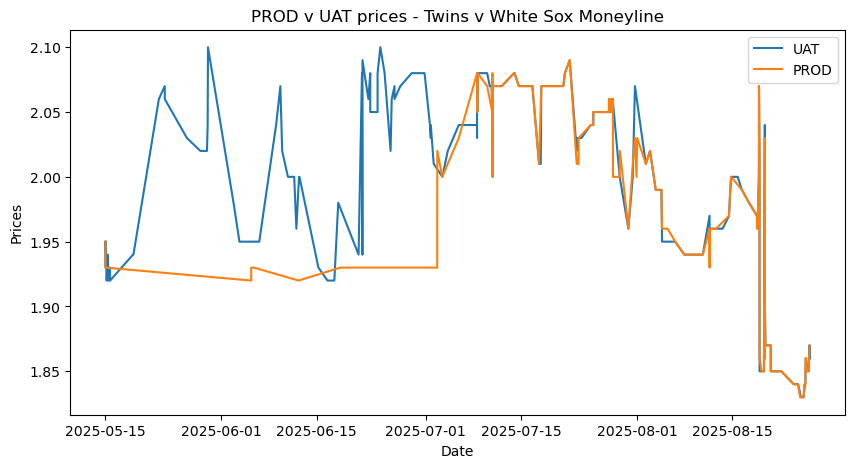

In [79]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(uat_data_csv["datetime"], uat_data_csv["price"], label="UAT")
ax.plot(prod_data_csv["datetime"], prod_data_csv["price"], label="PROD")

ax.set_xlabel("Date")
ax.set_ylabel("Prices")
ax.set_title("PROD v UAT prices - Twins v White Sox Moneyline")
ax.legend()
plt.show()